In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
%matplotlib inline

traindata = pd.read_csv("train_values.csv",sep=',')
traindata.columns[traindata.isna().any()]
data=traindata
data.drop(['building_id'], axis=1, inplace=True)
trainlabels = pd.read_csv("train_labels.csv",sep=',')
trainout=trainlabels
trainout.drop(['building_id'], axis=1, inplace=True)
testvalues = pd.read_csv("test_values.csv",sep=',')
testdata=testvalues
testdata.drop(['building_id'], axis=1, inplace=True)

In [2]:
cleanup_letters = {"land_surface_condition": {"n": 1, "o": 2, "t":3},
                "foundation_type": {"h": 1, "i": 2, "r": 3, "u": 4, "w": 5},               
                "roof_type": {"n": 1, "q": 2, "x": 3},
                "ground_floor_type": {"f": 1, "m": 2, "v": 3, "x": 4, "z": 5},
                "other_floor_type": {"j": 1, "q": 2, "s": 3, "x": 4},
                "position": {"j": 1, "o": 2, "s": 3, "t": 4},
                "plan_configuration": {"a": 1, "c": 2, "d": 3, "f": 4, "m": 5, "n": 6, "o": 7, "q": 8, "s": 9, "u":10},
                "legal_ownership_status": {"a": 1, "r": 2, "v": 3, "w": 4}             
               }
data.replace(cleanup_letters, inplace=True)
testdata.replace(cleanup_letters, inplace=True)
a = list(data)
del a[-1]
x = data[a].values
y = trainout['damage_grade'].values

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# creating ANN classifier
classifier = Sequential()
# one rule to determine the number of hidden layers
# is to average the number of input and output nodes
classifier.add(Dense(units=8, input_dim=37, kernel_initializer='uniform', activation='relu'))
# Add second hidden layers
classifier.add(Dense(units=64, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=128, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=512, kernel_initializer='uniform', activation='relu'))
# output layer
# also replace activation function to sigmoid to have probabilities
classifier.add(Dense(units=4, kernel_initializer='uniform', activation='sigmoid'))
# compile the classifier
# adam is a type of SGD
# crossentropy is log loss function, for binary classification, use 'binary_crossentropy' 
# for multiclass classification, use 'categorical_crossentropy'
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [43]:
history=classifier.fit(x, y, 
               epochs=20, 
               batch_size=128,validation_split=0.2)

Train on 208480 samples, validate on 52121 samples
Epoch 1/20
208480/208480 [==============================] - 22s 104us/step - loss: 0.8955 - acc: 0.5689 - val_loss: 0.8368 - val_acc: 0.5707
Epoch 2/20
208480/208480 [==============================] - 18s 87us/step - loss: 0.8375 - acc: 0.5712 - val_loss: 0.8265 - val_acc: 0.5732
Epoch 3/20
208480/208480 [==============================] - 17s 84us/step - loss: 0.8304 - acc: 0.5716 - val_loss: 0.8223 - val_acc: 0.5697
Epoch 4/20
208480/208480 [==============================] - 18s 84us/step - loss: 0.8248 - acc: 0.5718 - val_loss: 0.8248 - val_acc: 0.5712
Epoch 5/20
208480/208480 [==============================] - 17s 84us/step - loss: 0.8232 - acc: 0.5727 - val_loss: 0.8196 - val_acc: 0.5730
Epoch 6/20
208480/208480 [==============================] - 17s 83us/step - loss: 0.8213 - acc: 0.5731 - val_loss: 0.8150 - val_acc: 0.5741
Epoch 7/20
208480/208480 [==============================] - 18s 86us/step - loss: 0.8204 - acc: 0.5731 - val

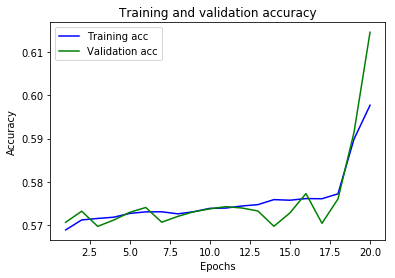

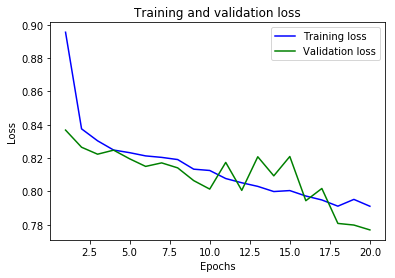

In [44]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title('Training and validation accuracy')
plt.legend()
fig = plt.figure()
fig.savefig('acc.png')


plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')

plt.legend()
plt.show()

In [96]:
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)
y_pred = np.argmax(y_pred, axis=1)
confusion_matrix(y_test, y_pred)

array([[    0,     0,     0,     0],
       [ 1877,  1881,  1209,    12],
       [ 9906,  1344, 17677,   776],
       [ 7858,    84,  8211,  1286]], dtype=int64)

In [97]:
(5051+0+0)/(5051+29722+17348)

0.09690911532779493

In [98]:
from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred,average='weighted')
f1

0.4421762234708847

In [70]:
model = Sequential()
model.add(Dense(input_dim=37, output_dim=512, init='glorot_uniform'))
model.add(PReLU(input_shape=(512,)))
model.add(BatchNormalization((512,)))
model.add(Dropout(0.5))

model.add(Dense(input_dim=512, output_dim=512, init='glorot_uniform'))
model.add(PReLU(input_shape=(512,)))
model.add(BatchNormalization((512,)))
model.add(Dropout(0.5))

model.add(Dense(input_dim=512, output_dim=512, init='glorot_uniform'))
model.add(PReLU(input_shape=(512,)))
model.add(BatchNormalization((512,)))
model.add(Dropout(0.5))

model.add(Dense(input_dim=512, output_dim=512, init='glorot_uniform'))
model.add(PReLU(input_shape=(512,)))
model.add(BatchNormalization((512,)))
model.add(Dropout(0.5))

model.add(Dense(input_dim=512, output_dim=512, init='glorot_uniform'))
model.add(PReLU(input_shape=(512,)))
model.add(BatchNormalization((512,)))
model.add(Dropout(0.5))

model.add(Dense(input_dim=512, output_dim=3, init='glorot_uniform'))
model.add(Activation('softmax'))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=37, units=512, kernel_initializer="glorot_uniform")`
  


NameError: name 'PReLU' is not defined

In [ ]:
model.fit(x_train, y_train, 
               epochs=100, 
               batch_size=1000)

In [ ]:
score = model.evaluate(X_test, y_test, batch_size=16)

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title('Training and validation accuracy')
plt.legend()
fig = plt.figure()
fig.savefig('acc.png')


plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')

plt.legend()
plt.show()